In [2]:
# use this to import from parent
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import numpy as np
import matplotlib.pyplot as plt 
import time
import pandas as pd 

import pyzx as zx

from ansatz_and_gates import *

In [5]:
qubits=10      
depth=50       

start = time.time()

circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=qubits, depth=depth, p_had=0.2, p_t=0.2  , clifford=False)
zx.draw(circuit)

create_c = time.time()
g=circuit.to_graph()
zx.draw(g)
convert_g= time.time()

zx.full_reduce(g, quiet=False) 
zx.draw(g)
optimize_g = time.time()

oc=zx.extract_circuit(g.copy())
zx.draw(oc)
extract_c=time.time()



spider_simp: 13. 11. 7. 1.  4 iterations
id_simp: 7. 1.  2 iterations
spider_simp: 2. 1.  2 iterations
pivot_simp: 6. 3. 1. 1.  4 iterations


In [6]:
t_total=extract_c-start
t_create=create_c-start
t_convert=convert_g-create_c
t_optimize=optimize_g-convert_g
t_extract=extract_c-optimize_g

print("t_create: ",t_create)
print("t_convert: ",t_convert)
print("t_convert: ",t_convert)
print("t_optimize: ",t_optimize)
print("t_extract: ",t_extract)
print("t_total: ",t_total)

t_create:  0.003220081329345703
t_convert:  0.002415895462036133
t_convert:  0.002415895462036133
t_optimize:  0.007993936538696289
t_extract:  0.008687973022460938
t_total:  0.022317886352539062


In [25]:
def experiment(nr_q,depth):
    #params=[np.random.normal(0, 1, 1)[0] * 2 * np.pi for i in range(3*nr_q*depth)]


    start = time.time()

    circuit = zx.generate.CNOT_HAD_PHASE_circuit(qubits=qubits, depth=depth, p_had=0.2, p_t=0.2  , clifford=False)
    #zx.draw(circuit)

    create_c = time.time()
    g=circuit.to_graph()
    #zx.draw(g)
    convert_g= time.time()

    zx.full_reduce(g, quiet=True) 
    #zx.draw(g)
    optimize_g = time.time()

    oc=zx.extract_circuit(g.copy())
    #zx.draw(oc)
    extract_c=time.time()

    t_total=extract_c-start
    t_create=create_c-start
    t_convert=convert_g-create_c
    t_optimize=optimize_g-convert_g
    t_extract=extract_c-optimize_g
    
    return t_total ,t_create,t_convert,t_optimize,t_extract


In [43]:
def get_data(nr_q,depth,reps=30):
    t_total_m=0
    t_create_m=0
    t_convert_m=0
    t_optimize_m=0
    t_extract_m=0
    for i in range(reps):
        t_total,t_create,t_convert,t_optimize,t_extract=experiment(nr_q,depth)
        t_total_m+=t_total/reps
        t_create_m+=t_create/reps
        t_convert_m+=t_convert/reps
        t_optimize_m+=t_optimize/reps
        t_extract_m+=t_extract/reps
        
    return t_total_m ,t_create_m,t_convert_m,t_optimize_m,t_extract_m
    

In [44]:
nr_q=[]
depth=[]
t_total=[]
t_create=[]
t_convert=[]
t_optimize=[]
t_extract=[]
for q in range(15,20):
    for d in range(300):
        t_total_m ,t_create_m,t_convert_m,t_optimize_m,t_extract_m=get_data(q,d,reps=1)
        nr_q.append(q)
        depth.append(d)
        t_total.append(t_total_m)
        t_create.append(t_create_m)
        t_convert.append(t_convert_m)
        t_optimize.append(t_optimize_m)
        t_extract.append(t_extract_m)


In [45]:
df = pd.DataFrame()
df['nr_q']=nr_q
df['depth']=depth
df['t_total']=t_total
df['t_create']=t_create
df['t_convert']=t_convert
df['t_optimize']=t_optimize
df['t_extract']=t_extract
df.head()

,nr_q,depth,t_total,t_create,t_convert,t_optimize,t_extract
0,15,0,0.003111,0.000021,0.000446,0.001167,0.001477
1,15,1,0.003453,0.000054,0.000431,0.001315,0.001653
2,15,2,0.003010,0.000028,0.000313,0.001251,0.001418
3,15,3,0.003262,0.000072,0.000407,0.001030,0.001753
4,15,4,0.003581,0.000044,0.000326,0.001422,0.001789


In [56]:
def time_dept_plot(df,nr_q,title='time(depth) nr_q='+str(nr_q)):
    plt.figure()
    depth=df[df['nr_q'] ==nr_q]['depth']

    #t_total= df[df['nr_q'] ==nr_q]['t_total']
    #plt.scatter(t_total,depth,label='t_total')

    t_create= df[df['nr_q'] ==nr_q]['t_create']
    plt.scatter(depth,t_create,label='t_create')

    t_convert= df[df['nr_q'] ==nr_q]['t_convert']
    
    plt.scatter(depth,t_convert,label='t_convert')


    t_optimize= df[df['nr_q'] ==nr_q]['t_optimize']
    plt.scatter(depth,t_optimize,label='t_optimize')

    t_extract= df[df['nr_q'] ==nr_q]['t_extract']
    print('len t_extract:',len(t_extract))
    plt.scatter(depth,t_extract,label='t_extract')


    plt.legend()
    plt.xlabel('depth')
    plt.ylabel('time')
    plt.title(title)
    plt.show()

len t_extract 300


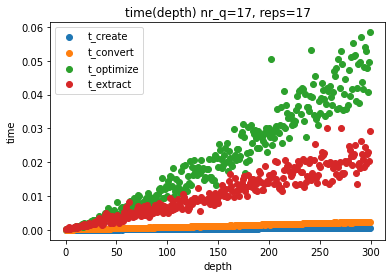

In [57]:
time_dept_plot(df,nr_q=17,title='time(depth) nr_q=17, reps=17')

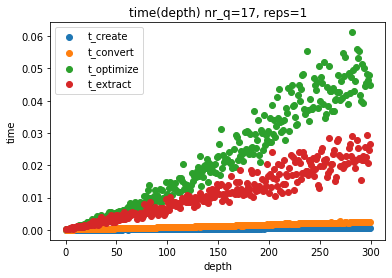

In [30]:
nr_q=17
time_dept_plot(df,nr_q=17,title='time(depth) nr_q=17, reps=1')
print()

In [ ]:
#  circuit : zx.generate.CNOT_HAD_PHASE_circuit
#  optimizer: zx.full_reduce 
#  extration: zx.extract_circuit
# OBS :
#-> depth has another meaning here
#-> Here the circuits do not respect a structure that is why the graph is so scattered. 
#-> t_optimize and t_extract they are the most expensive
#-> 